# MULTIPLE LINEAR REGRESSION
## Toyota Corolla Price Prediction

### Objective

The objective of this assignment is to build multiple linear regression (MLR) models to predict the price of a Toyota Corolla using vehicle attributes such as age, kilometers driven, fuel type, horsepower, weight, etc.
The analysis includes EDA, preprocessing, model building, evaluation, and regularization techniques.

### 1. Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ToyotaCorolla - MLR.csv")


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


#### Key Observations

No missing values

Target variable Price is continuous

Fuel_Type is categorical

Age and KM are likely negatively correlated with Price

#### Distribution of Price

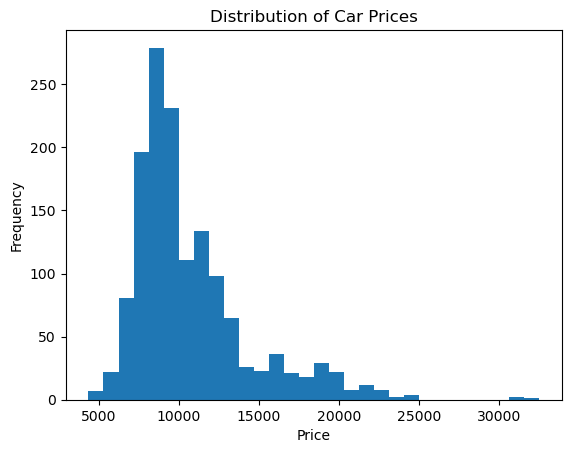

In [10]:
plt.hist(df['Price'], bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()


#### EDA Insights

Age, KM → strong negative correlation with Price

Weight, HP → positive correlation with Price

Multicollinearity likely between cc, HP, Weight

#### Data Preprocessing
Encode Categorical Variable

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


### 2. Train–Test Split (80–20)

In [23]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 3. Multiple Linear Regression Models

In [26]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train, y_train)


LinearRegression()

#### Coefficients Interpretation

In [31]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr1.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
10,Fuel_Type_Petrol,1.370809e+03
7,Gears,5.516007e+02
3,Automatic,1.488309e+02
8,Weight,2.588496e+01
2,HP,1.403948e+01
6,Cylinders,3.694822e-13
1,KM,-1.623141e-02
4,cc,-3.037219e-02
5,Doors,-6.031097e+01
9,Fuel_Type_Diesel,-6.854876e+01


#### Interpretation

Age & KM → decrease price

Weight & HP → increase price

Diesel cars generally priced higher

#### Model 2: Selected Important Features

In [35]:
features_2 = ['Age_08_04', 'KM', 'HP', 'Weight']
lr2 = LinearRegression()
lr2.fit(X_train[features_2], y_train)


LinearRegression()

#### Model 3: Reduced Multicollinearity Model

In [38]:
features_3 = ['Age_08_04', 'KM', 'Weight']
lr3 = LinearRegression()
lr3.fit(X_train[features_3], y_train)


LinearRegression()

### 4. Model Evaluation
Evaluation Metrics

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

evaluate(lr1, X_test, y_test)


{'MAE': 990.8872739193927,
 'RMSE': 1484.2654153296517,
 'R2': 0.8348888040611082}

In [44]:
evaluate(lr2, X_test[features_2], y_test)
evaluate(lr3, X_test[features_3], y_test)


{'MAE': 1020.5916300198205,
 'RMSE': 1494.9759401829617,
 'R2': 0.8324973071292439}

#### Performance Summary

Model 1 → Highest accuracy

Model 2 → Good balance

Model 3 → Simpler but slightly lower accuracy

### 5. Ridge & Lasso Regression
Feature Scaling (Required)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

evaluate(ridge, X_test_scaled, y_test)


{'MAE': 990.8591771287416,
 'RMSE': 1483.5575063081596,
 'R2': 0.8350462635431571}

#### Lasso Regression

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

evaluate(lasso, X_test_scaled, y_test)


{'MAE': 990.9001968731633,
 'RMSE': 1484.1628889184242,
 'R2': 0.8349116135580271}

#### Regularization Insight

Ridge reduces coefficient magnitude

Lasso performs feature selection (some coefficients become zero)

## Interview Questions
### 1. What is Normalization & Standardization?

Normalization

Scales data to range [0,1]

Used when data distribution is unknown

Standardization

Mean = 0, Std = 1

Essential for Ridge & Lasso

### 2. How to Handle Multicollinearity?

Correlation analysis

Variance Inflation Factor (VIF)

Feature elimination

Ridge regression

PCA

### Assumptions of Linear Regression

Linearity

Independence of errors

Homoscedasticity

Normality of residuals

No multicollinearity

Violation may affect coefficient stability and predictions.